## Shubham Bhatt
## Prediction using Unsupervised ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
iris_data=pd.read_csv("Iris.csv")
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
from sklearn.cluster import KMeans

Checking for optimum number of clusters

In [4]:
x=iris_data.drop('Species',axis=1)
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


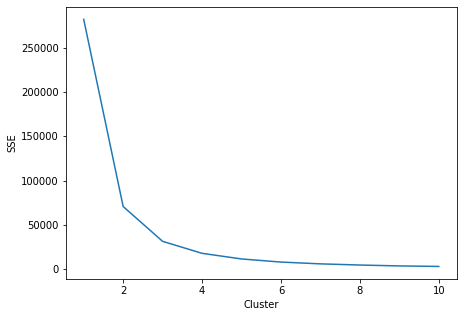

In [5]:
SSE=[]
for cluster in range(1,11):
    kmeans=KMeans(n_clusters=cluster,random_state=0)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)

df=pd.DataFrame({'SSE':SSE,'Cluster':range(1,11)})
plt.figure(figsize=(7,5))
sns.lineplot(df['Cluster'],df['SSE'])
plt.show()

By creating a Elbow curve we get that after cluster=3 there is less subsequent chages between the inertia values.
Therefore Optimum number of clusters=3

In [6]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(x)
clus=kmeans.predict(x)
x['Cluster']=clus
x.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
5,6,5.4,3.9,1.7,0.4,1
6,7,4.6,3.4,1.4,0.3,1
7,8,5.0,3.4,1.5,0.2,1
8,9,4.4,2.9,1.4,0.2,1
9,10,4.9,3.1,1.5,0.1,1


Plotting the relationships between different factors

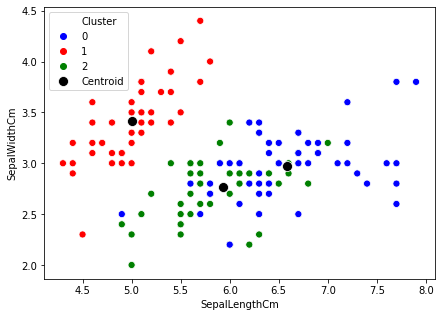

In [7]:
plt.figure(figsize=(7,5))
sns.scatterplot(x.iloc[:,1],x.iloc[:,2],hue=x['Cluster'],palette=['blue','red','green'],s=50)
sns.scatterplot(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],label='Centroid',color='k',s=100)
plt.show()

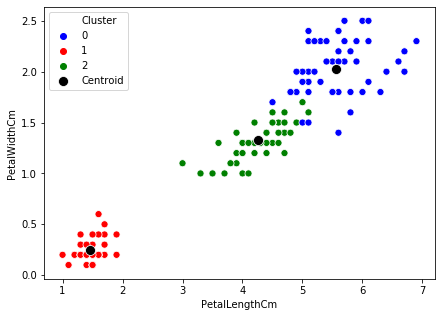

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(x.iloc[:,3],x.iloc[:,4],hue=x['Cluster'],palette=['blue','red','green'],s=50)
sns.scatterplot(kmeans.cluster_centers_[:,3],kmeans.cluster_centers_[:,4],label='Centroid',color='k',s=100)
plt.show()

## Alternative Method

Splitting data according to their respective cluster

In [9]:
df1=x[x['Cluster']==0]
df2=x[x['Cluster']==1]
df3=x[x['Cluster']==2]

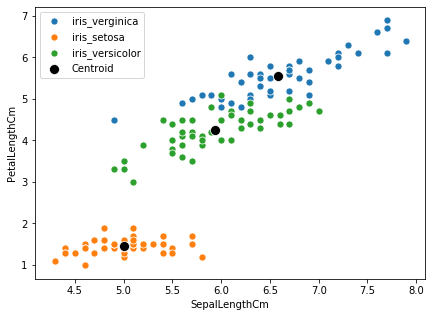

In [10]:
plt.figure(figsize=(7,5))
sns.scatterplot(df1.iloc[:,1],df1.iloc[:,3],label='iris_verginica',s=50)
sns.scatterplot(df2.iloc[:,1],df2.iloc[:,3],label='iris_setosa',s=50)
sns.scatterplot(df3.iloc[:,1],df3.iloc[:,3],label='iris_versicolor',s=50)

sns.scatterplot(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,3],label='Centroid',s=100,color='k')
plt.show()

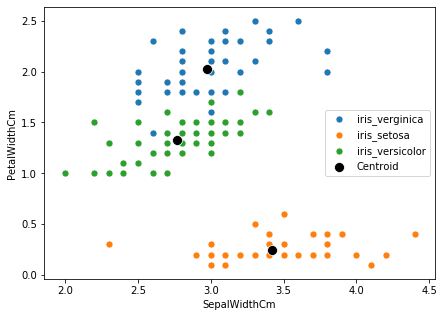

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(df1.iloc[:,2],df1.iloc[:,4],label='iris_verginica',s=50)
sns.scatterplot(df2.iloc[:,2],df2.iloc[:,4],label='iris_setosa',s=50)
sns.scatterplot(df3.iloc[:,2],df3.iloc[:,4],label='iris_versicolor',s=50)

sns.scatterplot(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,4],label='Centroid',s=100,color='k')
plt.show()